Load the data
1. Load wine data from the two source files winequality-red.xlsx and winequalitywhite.xslx.
2. Clean the data in both files.
3. Aggregate the two files in one still keeping the identity of each wine type - “red” or “white”.

In [16]:
import pandas as pd
import numpy as np


# loader data ind i dataframes. Bruger sep da filerne er separeret med semikolon og ikke "komma"
red_wine_df = pd.read_csv('winequality-red.csv', sep=";")
white_wine_df = pd.read_csv('winequality-white.csv', sep=";")

In [256]:
# Tilføjer en kolonne i hver datafram for at identificere typen af vin.
red_wine_df['wine_type'] = 'Red'
white_wine_df['wine_type'] = 'White'

# Kombinerer begge DataFrames
combined_wines = pd.concat([red_wine_df, white_wine_df], ignore_index=True)

# ignore_index=True sørger for, at den nye DataFrame får en kontinuerlig indeksering

# Nu omdanner jeg wine_type værdierne fra qualitative norminal til quantitative discrete med one-hot-encoding

# One-hot encoding af 'wine_type' kolonnen
combined_wines = pd.get_dummies(combined_wines, columns=['wine_type'])

# omdanner boolean til int som værdi
combined_wines['wine_type_White'] = combined_wines['wine_type_White'].astype(int)
combined_wines['wine_type_Red'] = combined_wines['wine_type_Red'].astype(int)

combined_wines.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_Red,wine_type_White
616,9.6,0.60,0.50,2.3,0.079,28.0,71.0,0.99970,3.50,0.57,9.7,5,1,0
2204,6.3,0.26,0.49,1.5,0.052,34.0,134.0,0.99240,2.99,0.61,9.8,6,0,1
630,8.7,0.54,0.26,2.5,0.097,7.0,31.0,0.99760,3.27,0.60,9.3,6,1,0
4993,6.5,0.25,0.45,7.8,0.048,52.0,188.0,0.99576,3.20,0.53,9.1,5,0,1
4180,6.8,0.18,0.30,12.8,0.062,19.0,171.0,0.99808,3.00,0.52,9.0,7,0,1


### 4. Explore the features of the original and the new files:
a. number of rows and columns<br>
b. type of data in each column

### 5. Calculate the descriptive statistics of the numeric data.
Check if the values of the attributes are normally distributed.

In [122]:
combined_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_Red,wine_type_White
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

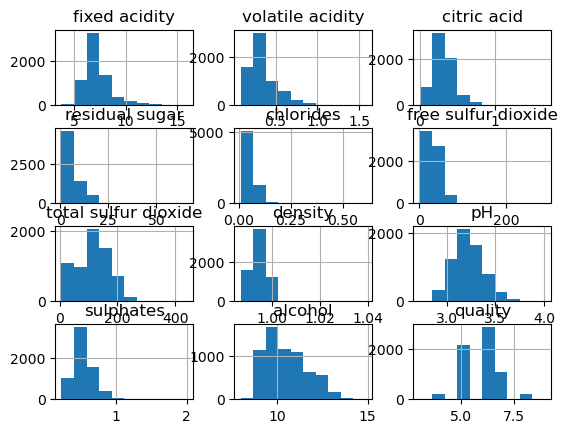

In [84]:
combined_wines.hist()

#### viser et histogram for hver kolonne med et for loop. med KDE (Kernel Density Estimation)

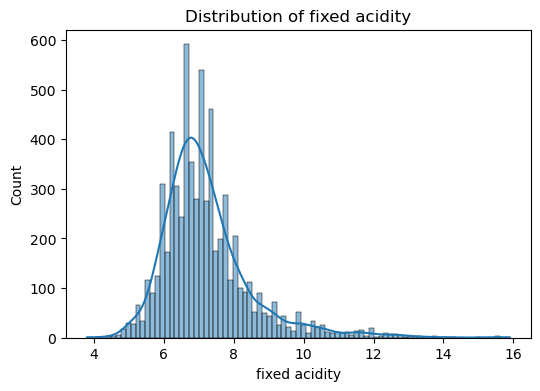

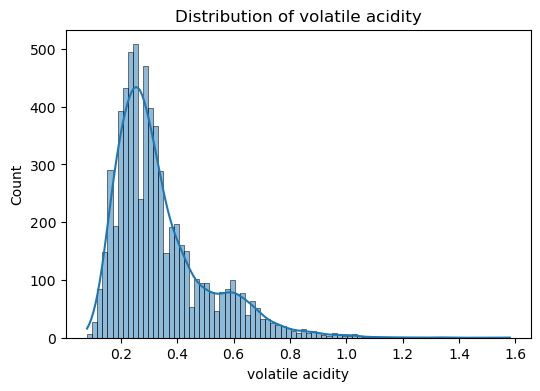

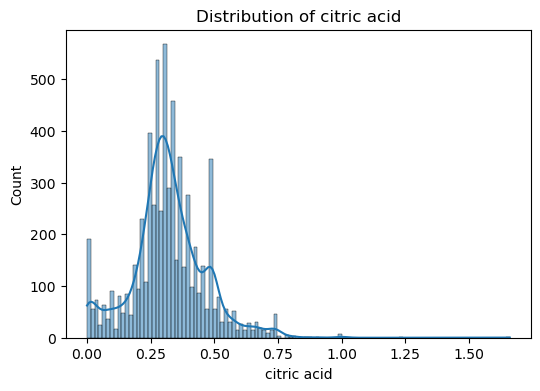

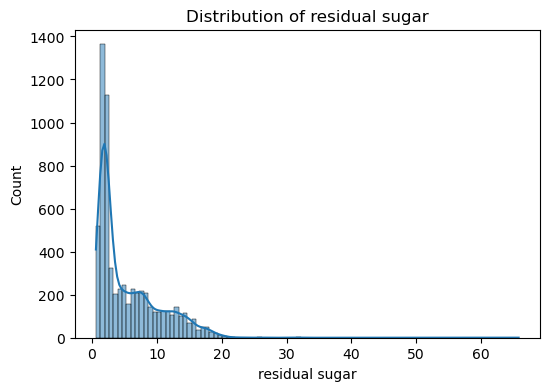

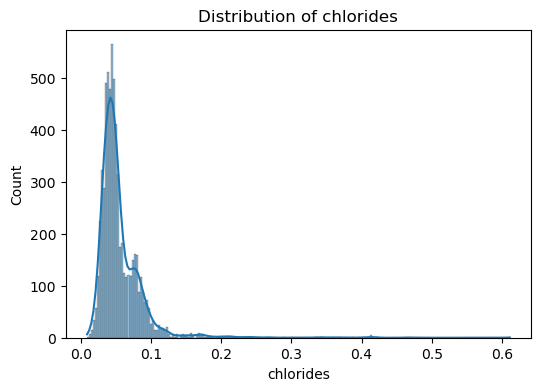

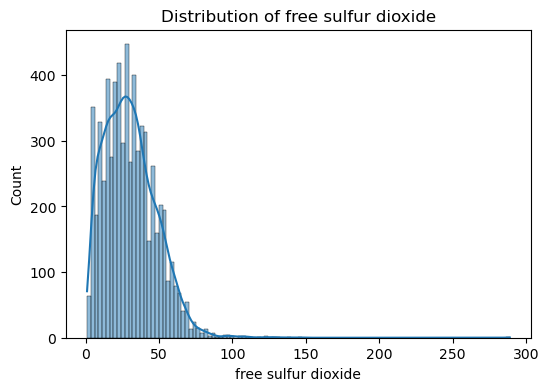

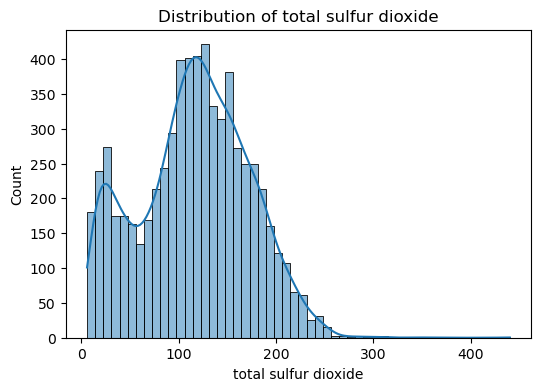

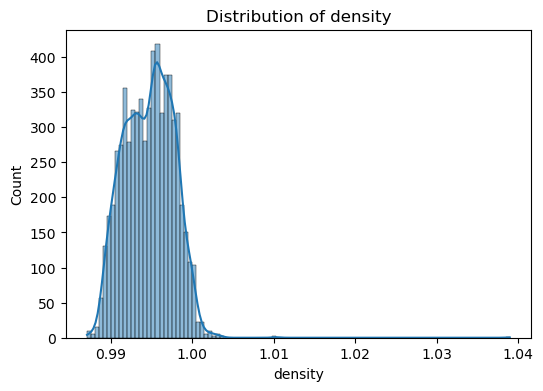

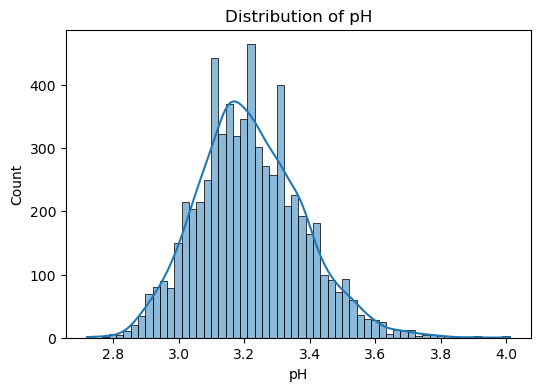

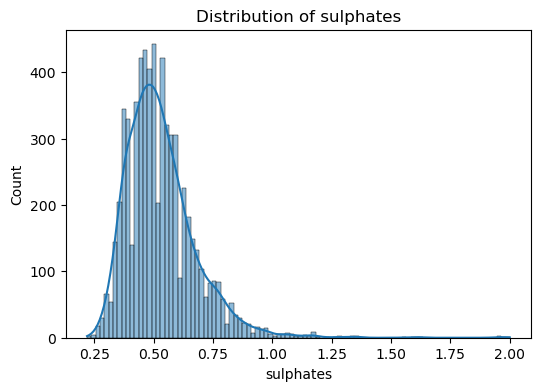

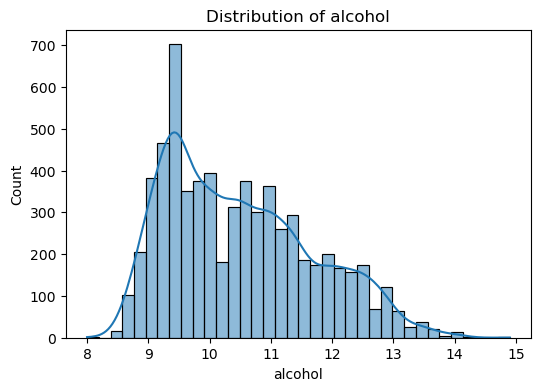

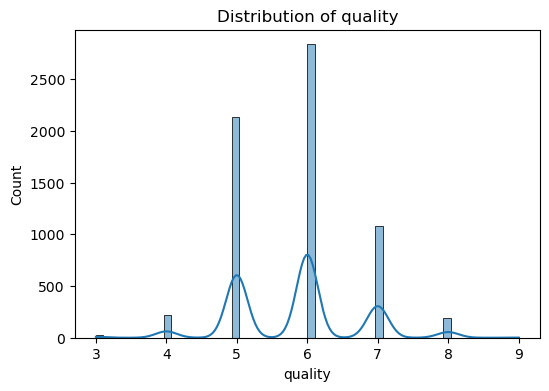

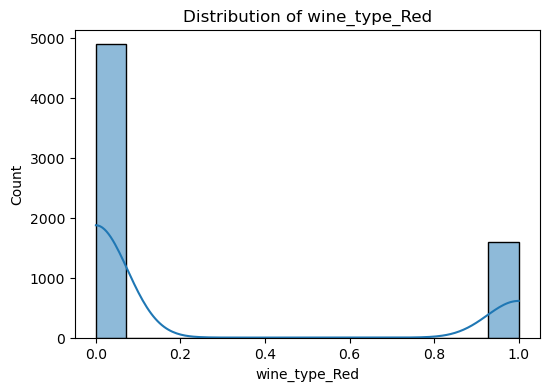

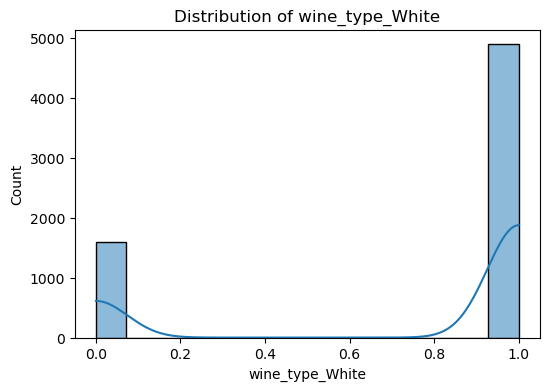

In [135]:
# Kolonner du vil undersøge
columns_to_check = combined_wines.select_dtypes(include=['float64', 'int64']).columns

# Plot histogrammer for hver kolonne
for col in columns_to_check:
    plt.figure(figsize=(6, 4))
    sns.histplot(combined_wines[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

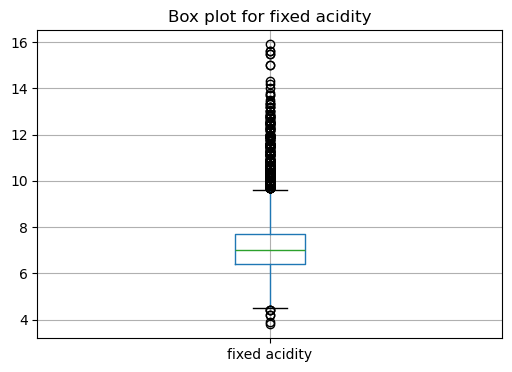

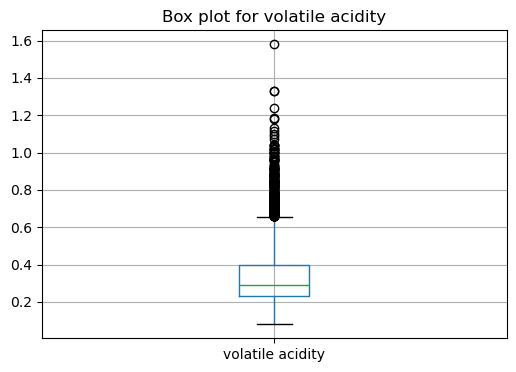

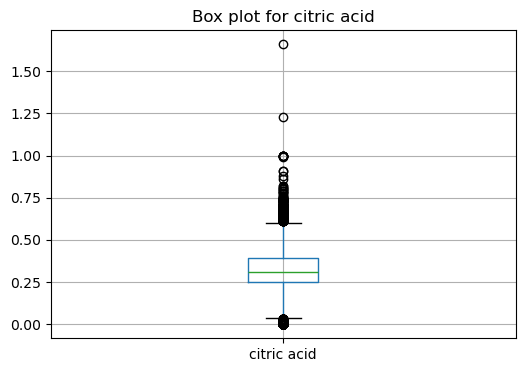

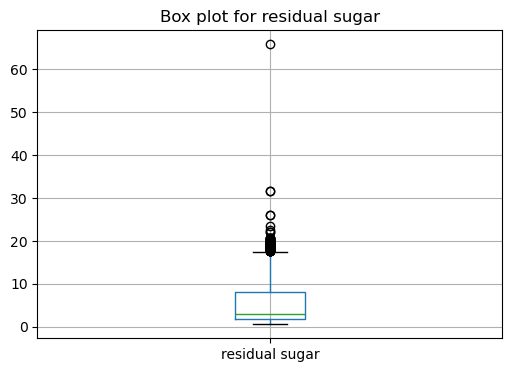

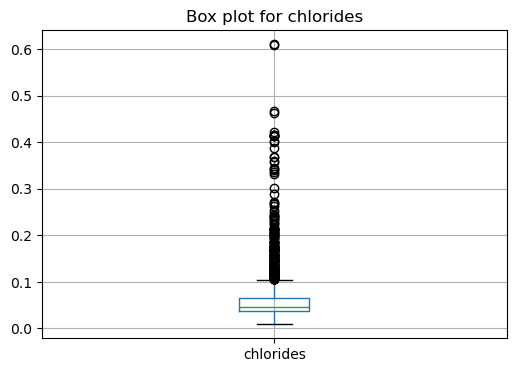

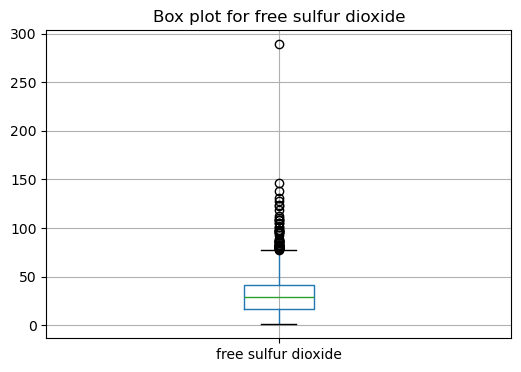

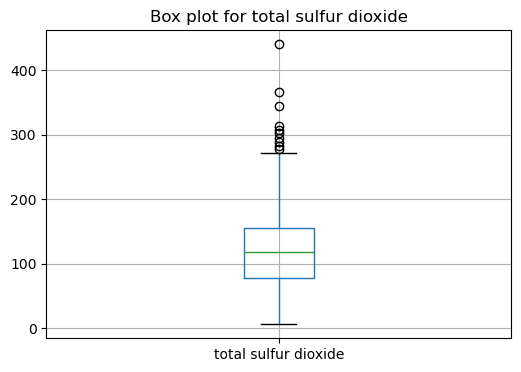

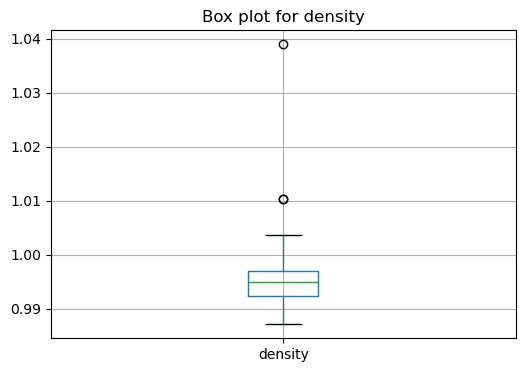

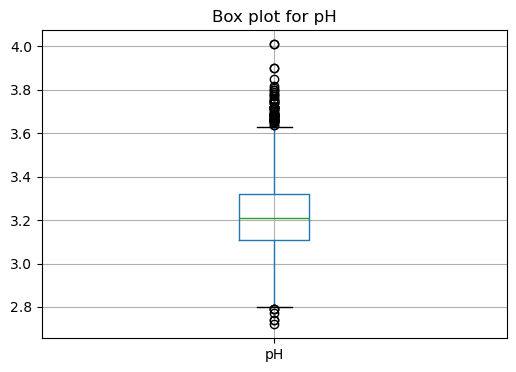

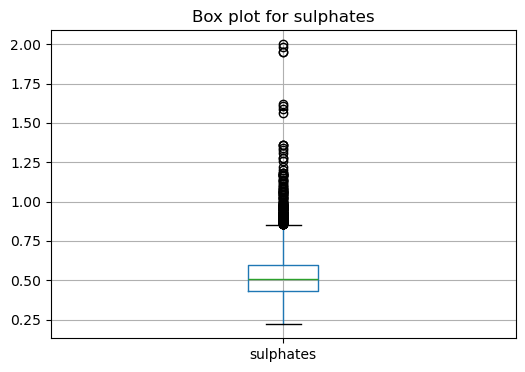

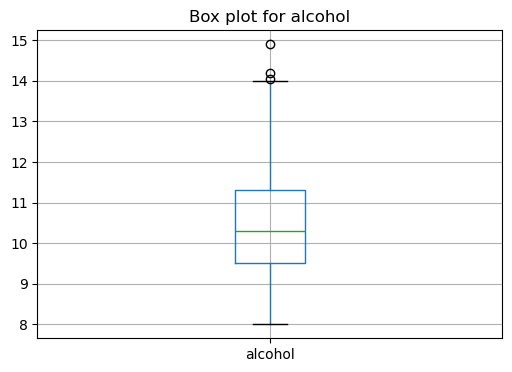

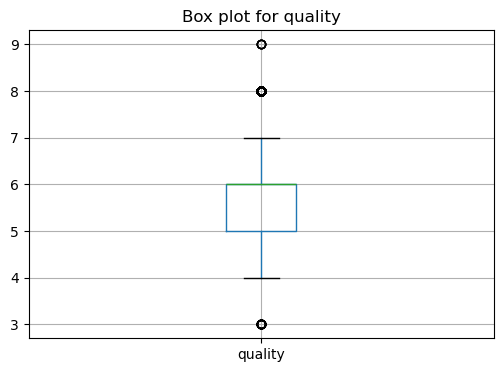

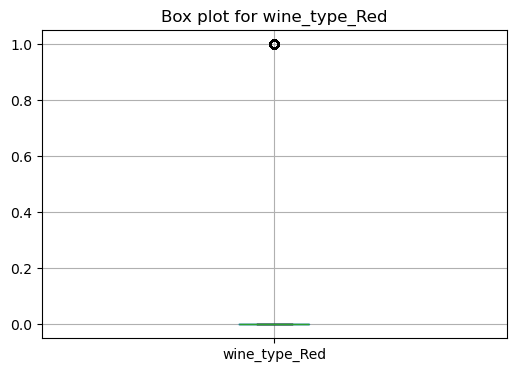

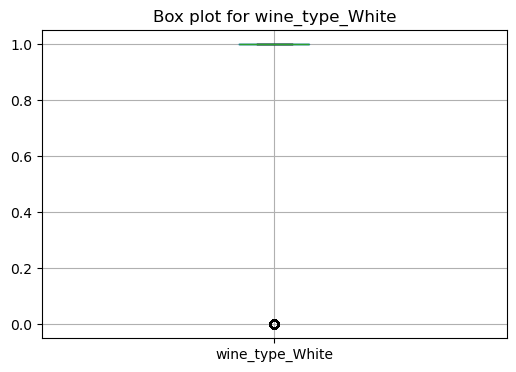

In [140]:
for col in columns_to_check:
    plt.figure(figsize=(6, 4))
    combined_wines.boxplot(column=[col])
    plt.title(f'Box plot for {col}')
    plt.show()

### 6. Plot diagrams that visualize the differences in red and white wine samples. Use as many diagrams as appropriate. Use the diagrams as a support for answering the following questions:
1. what do diagrams show exactly?
2. which type of wine has higher average quality, how big is the difference?
3. which type of wine has higher average level of alcohol?
4. which one has higher average quantity of residual sugar?
5. do the quantity of alcohol and residual sugar influence the quality of the wine?

In [153]:
# kopierer tidligere DF hvis jeg nu skal bruge dem seperat senere uden at manipulere originalen.

red_wine = red_wine_df
white_wine = white_wine_df

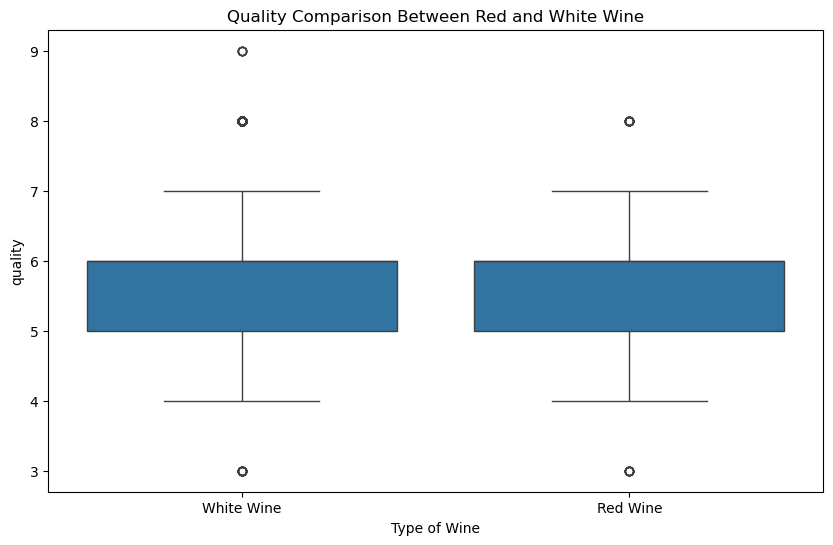

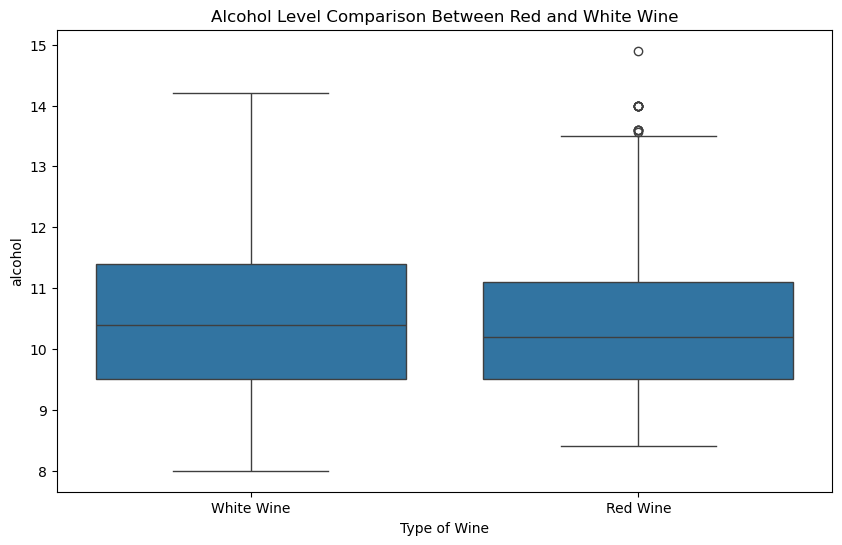

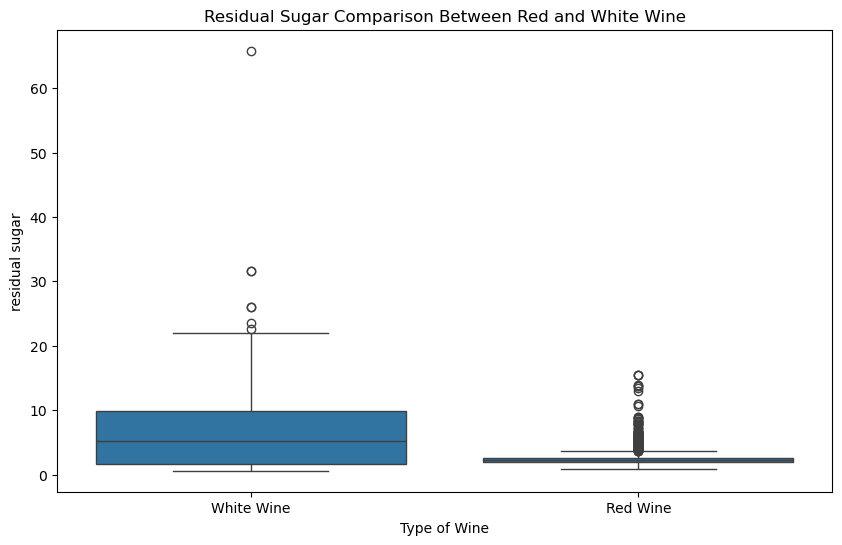

In [176]:
# Plot af kvaliteten for rød og hvidvin
plt.figure(figsize=(10, 6))
sns.boxplot(x='wine_type_Red', y='quality', data=combined_wines)
plt.title('Quality Comparison Between Red and White Wine')
# pga one-hot-encoding har vi værdierne 0 for hvid og 1 for rød. omdannet længere oppe via dummies
# Fremfor at der skal stå 0 og 1 under søjlerne ændre jeg det til Red and White - læsbarhed
plt.xticks([0, 1], ['White Wine', 'Red Wine'])
plt.xlabel('Type of Wine')  # Ændrer x-aksens titel
plt.show()

# Plot af alkoholniveau for rød og hvidvin
plt.figure(figsize=(10, 6))
sns.boxplot(x='wine_type_Red', y='alcohol', data=combined_wines)
plt.title('Alcohol Level Comparison Between Red and White Wine')
plt.xticks([0, 1], ['White Wine', 'Red Wine'])
plt.xlabel('Type of Wine')  # Ændrer x-aksens titel
plt.show()

# Plot af residual sukker for rød og hvidvin
plt.figure(figsize=(10, 6))
sns.boxplot(x='wine_type_Red', y='residual sugar', data=combined_wines)
plt.title('Residual Sugar Comparison Between Red and White Wine')
plt.xticks([0, 1], ['White Wine', 'Red Wine'])
plt.xlabel('Type of Wine')  # Ændrer x-aksens titel
plt.show()

### b. which type of wine has higher average quality, how big is the difference? 

In [155]:
# Beregn gennemsnitlig kvalitet for rød og hvidvin
avg_quality_red = red_wine_df['quality'].mean()
avg_quality_white = white_wine_df['quality'].mean()

print(f'Gennemsnitlig kvalitet for rødvin: {avg_quality_red:.2f}')
print(f'Gennemsnitlig kvalitet for hvidvin: {avg_quality_white:.2f}')

Gennemsnitlig kvalitet for rødvin: 5.64
Gennemsnitlig kvalitet for hvidvin: 5.88


In [167]:
print(f"""Red wine has higer average quality by {abs(avg_quality_red - avg_quality_white):.2f}""")

# bruger abs() for at sikre et positivt værdi.

Red wine has higer average quality by 0.24


### c. which type of wine has higher average level of alcohol?

In [187]:
# Beregn gennemsnitlig kvalitet for rød og hvidvin
avg_alcohol_red = red_wine_df['alcohol'].mean()
avg_alcohol_white = white_wine_df['alcohol'].mean()

print(f'Gennemsnitlig alkohol for rødvin: {avg_alcohol_red:.2f}')
print(f'Gennemsnitlig alkohol for hvidvin: {avg_alcohol_white:.2f}')

Gennemsnitlig alkohol for rødvin: 10.42
Gennemsnitlig alkohol for hvidvin: 10.51


In [189]:
print(f"""White wine has higer average alcohol by {abs(avg_alcohol_red - avg_alcohol_white):.2f}""")

# bruger abs() for at sikre et positivt værdi.

White wine has higer average alcohol by 0.09


### d. which one has higher average quantity of residual sugar?

In [196]:
# Beregn gennemsnitlig mængde af residual sukker for rød og hvidvin
avg_sugar_red = red_wine['residual sugar'].mean()
avg_sugar_white = white_wine['residual sugar'].mean()

print(f'Gennemsnitlig residual sukker for rødvin: {avg_sugar_red:.2f}')
print(f'Gennemsnitlig residual sukker for hvidvin: {avg_sugar_white:.2f}')
print(f'Forskellen i gennemsnitlig residual sukker: {abs(avg_sugar_red - avg_sugar_white):.2f}')


Gennemsnitlig residual sukker for rødvin: 2.54
Gennemsnitlig residual sukker for hvidvin: 6.39
Forskellen i gennemsnitlig residual sukker: 3.85


### c.  do the quantity of alcohol and residual sugar influence the quality of the wine?

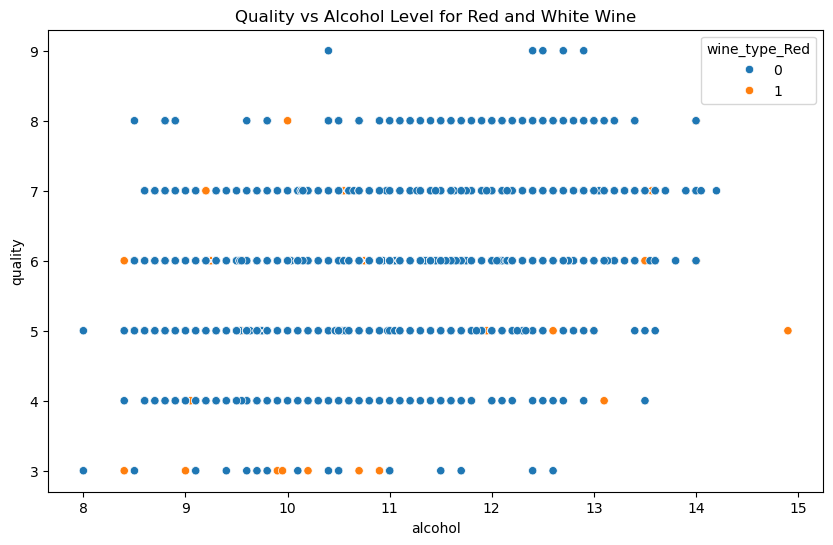

In [212]:
# Scatterplot af kvalitet vs alkohol
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='quality', hue='wine_type_Red', data=combined_wines)
plt.title('Quality vs Alcohol Level for Red and White Wine')
plt.show()

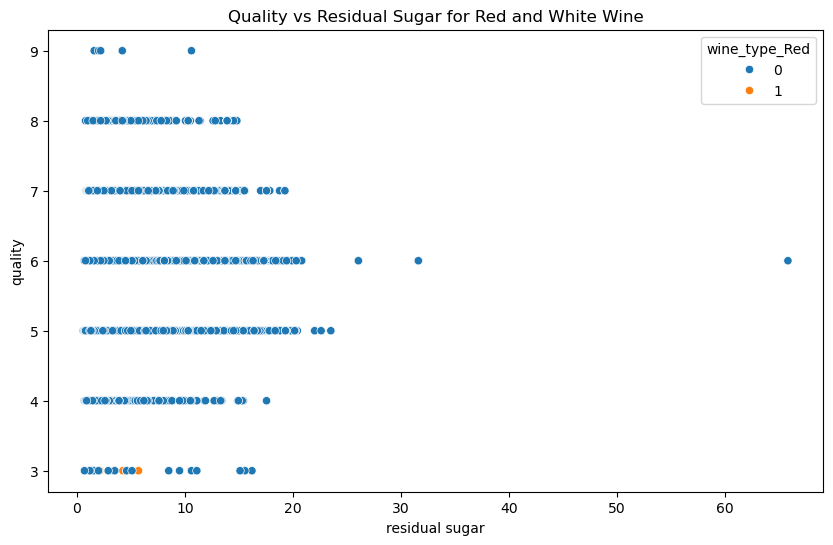

In [206]:
# Scatterplot af kvalitet vs residual sukker
plt.figure(figsize=(10, 6))
sns.scatterplot(x='residual sugar', y='quality', hue='wine_type_Red', data=combined_wines)
plt.title('Quality vs Residual Sugar for Red and White Wine')
plt.show()

### 8. Split the aggregated data into five subsets by binning the attribute pH. Which subset has highest density? What if you split the data in ten subsets?

In [292]:
# laver en kkopi af originalen
combined_wines_copy = combined_wines.copy()

# opdeler data i 5 subset
density_5bins = combined_wines_copy.groupby([(pd.cut(combined_wines_copy['density'], bins=5))])

#printer density
density_5bins.count()

/var/folders/nb/fxty61xd7jsbp25hcb0fqkr00000gn/T/ipykernel_8263/2933182160.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  density_5bins = combined_wines_copy.groupby([(pd.cut(combined_wines_copy['density'], bins=5))])


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_Red,wine_type_White
density,,,,,,,,,,,,,,
"(0.987, 0.997]",5244,5244,5244,5244,5244,5244,5244,5244,5244,5244,5244,5244,5244,5244
"(0.997, 1.008]",1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250
"(1.008, 1.018]",2,2,2,2,2,2,2,2,2,2,2,2,2,2
"(1.018, 1.029]",0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(1.029, 1.039]",1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [294]:
# bin med den højeste værdi (flest observationer)
highest_density_5bins = density_5bins.count().idxmax()

print(f"\nThe bin with the highest number of observations is: {highest_density_5bins}")


The bin with the highest number of observations is: fixed acidity           (0.987, 0.997]
volatile acidity        (0.987, 0.997]
citric acid             (0.987, 0.997]
residual sugar          (0.987, 0.997]
chlorides               (0.987, 0.997]
free sulfur dioxide     (0.987, 0.997]
total sulfur dioxide    (0.987, 0.997]
density                 (0.987, 0.997]
pH                      (0.987, 0.997]
sulphates               (0.987, 0.997]
alcohol                 (0.987, 0.997]
quality                 (0.987, 0.997]
wine_type_Red           (0.987, 0.997]
wine_type_White         (0.987, 0.997]
dtype: category
Categories (5, interval[float64, right]): [(0.987, 0.997] < (0.997, 1.008] < (1.008, 1.018] < (1.018, 1.029] < (1.029, 1.039]]


In [296]:
# opdeler data i 10 subset
density_10bins = combined_wines_copy.groupby([(pd.cut(combined_wines_copy['density'], bins=10))])

#printer density
density_10bins.count()

/var/folders/nb/fxty61xd7jsbp25hcb0fqkr00000gn/T/ipykernel_8263/1915042488.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  density_10bins = combined_wines_copy.groupby([(pd.cut(combined_wines_copy['density'], bins=10))])


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_Red,wine_type_White
density,,,,,,,,,,,,,,
"(0.987, 0.992]",1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599
"(0.992, 0.997]",3645,3645,3645,3645,3645,3645,3645,3645,3645,3645,3645,3645,3645,3645
"(0.997, 1.003]",1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241
"(1.003, 1.008]",9,9,9,9,9,9,9,9,9,9,9,9,9,9
"(1.008, 1.013]",2,2,2,2,2,2,2,2,2,2,2,2,2,2
"(1.013, 1.018]",0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(1.018, 1.023]",0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(1.023, 1.029]",0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(1.029, 1.034]",0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [298]:
# bin med den højeste værdi (flest observationer)
highest_density_10bins = density_10bins.count().idxmax()

print(f"\nThe bin with the highest number of observations is: {highest_density_10bins}")


The bin with the highest number of observations is: fixed acidity           (0.992, 0.997]
volatile acidity        (0.992, 0.997]
citric acid             (0.992, 0.997]
residual sugar          (0.992, 0.997]
chlorides               (0.992, 0.997]
free sulfur dioxide     (0.992, 0.997]
total sulfur dioxide    (0.992, 0.997]
density                 (0.992, 0.997]
pH                      (0.992, 0.997]
sulphates               (0.992, 0.997]
alcohol                 (0.992, 0.997]
quality                 (0.992, 0.997]
wine_type_Red           (0.992, 0.997]
wine_type_White         (0.992, 0.997]
dtype: category
Categories (10, interval[float64, right]): [(0.987, 0.992] < (0.992, 0.997] < (0.997, 1.003] < (1.003, 1.008] ... (1.018, 1.023] < (1.023, 1.029] < (1.029, 1.034] < (1.034, 1.039]]


### 9. Create a heat map or a correlation matrix of all data and investigate it. Can you tell which wine attribute has the biggest influence on the wine quality? Which has the lowest? Are there any attributes, apart from the wine quality, which are highly correlated?

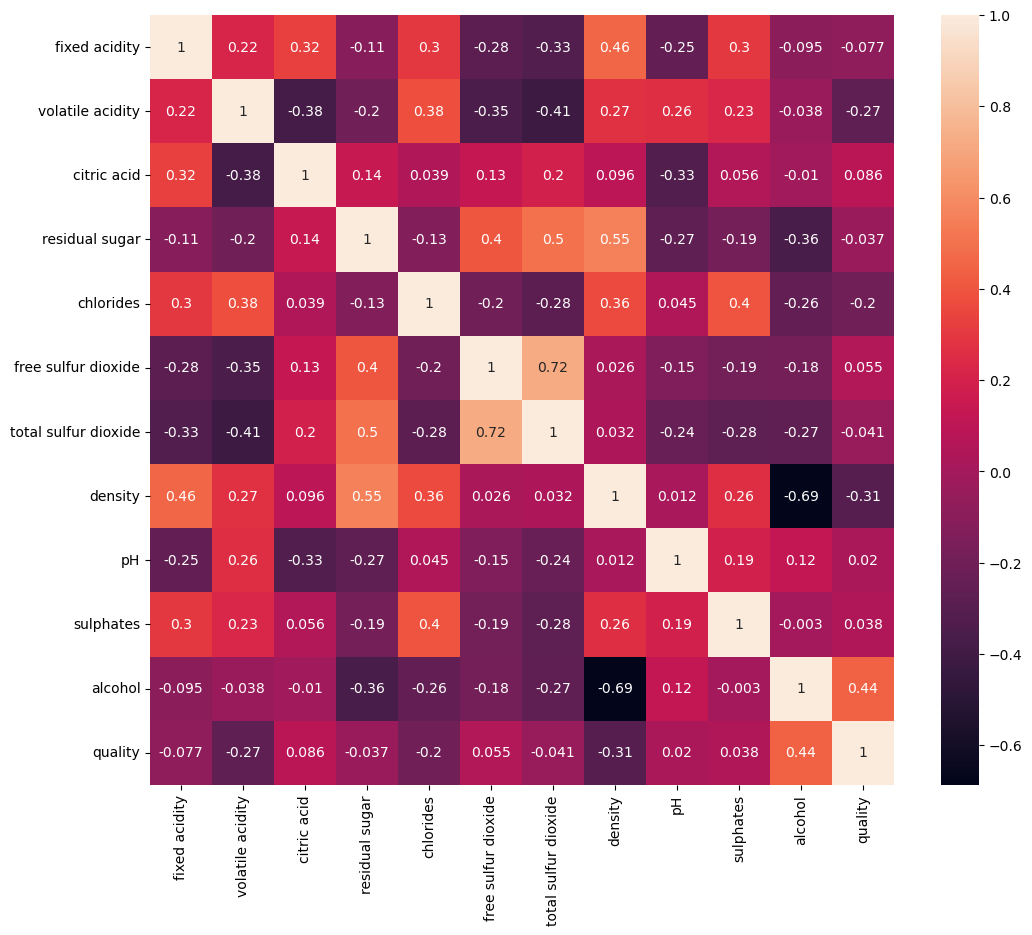

In [336]:
# Opretter korrelationsmatrix
wines_drop_types = combined_wines.copy()

# dropping types
wines_drop_types = wines_drop_types.drop(columns=['wine_type_Red', 'wine_type_White'])

corr_matrix = wines_drop_types.corr()

# opretter et plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True)

# viser plot... DET ER ÅBENBART IKKE NØDVENDIGT MED NEDENSTÅENDE FOR AT VISE PLOT, men uden denne vil der stå <axes over map'et>
plt.show()

### 10. Do you get the same correlation results when you analyze the red and the white wine data sets separately?

#### Red and white wine in one DF:
- Highest correlation value is with alcohol at 0.44.
- Lowest correlation value is with pH at 0.02.
- The best quality of mixed win type is most closely correlated with alcohol concentration.

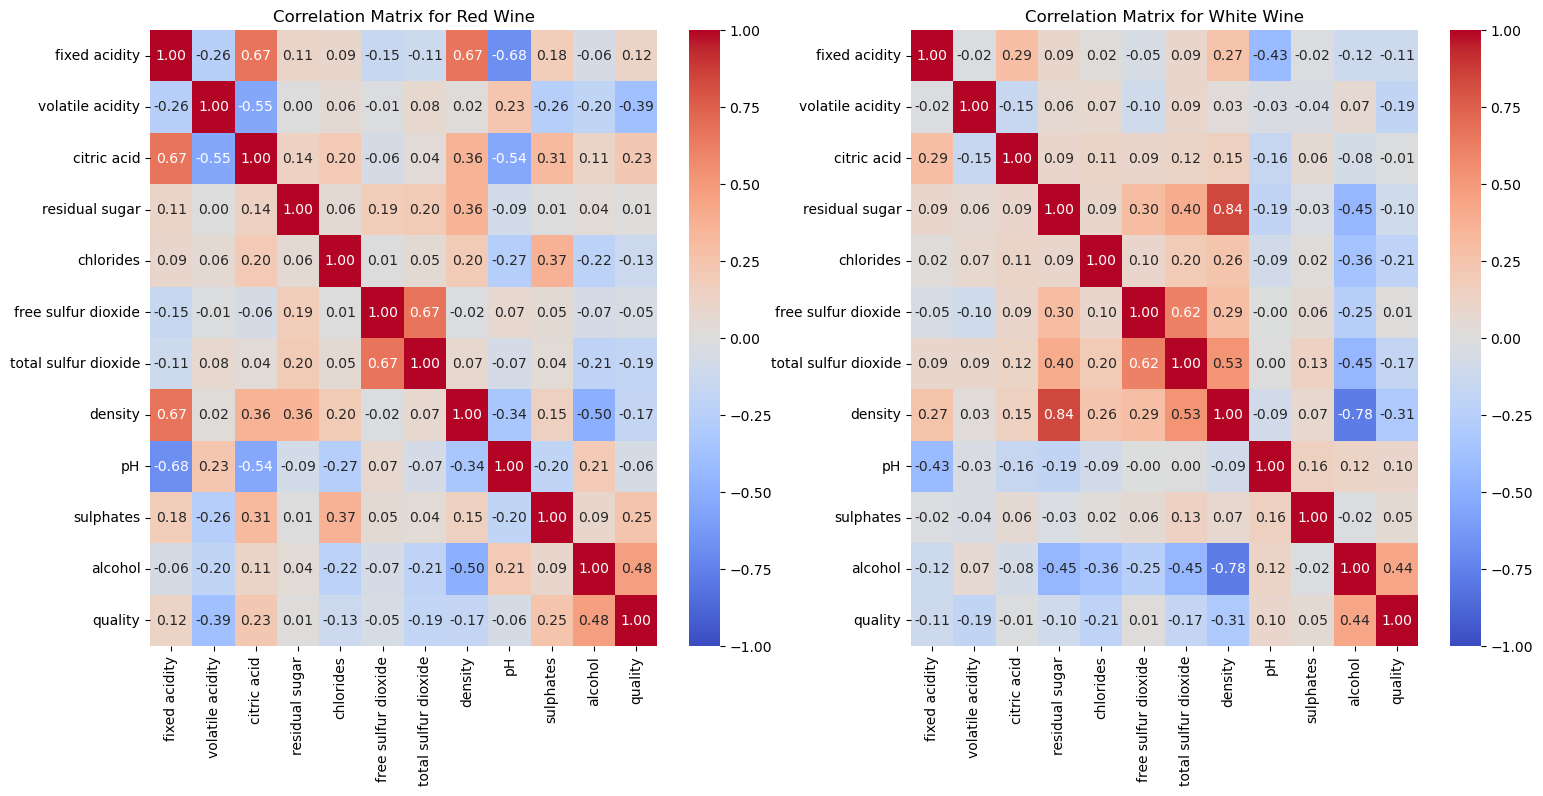

In [314]:
# Tjekker correlation by type of wine seperatly
red_win_without_wine_type = red_wine.drop(columns=['wine_type']) #fjerner kolonnen da den ikke skal eller kan ingdå i heatmappen (not numeral)
red_wine_matrix = red_win_without_wine_type.corr()

white_win_without_wine_type = white_wine.drop(columns=['wine_type'])
white_wine_matrix = white_win_without_wine_type.corr()

# Opretter subplots til heatmaps
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot korrelationsmatrix som heatmap til rødvin
sns.heatmap(red_wine_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('Correlation Matrix for Red Wine')

# Plot korrelationsmatrix som heatmap til hvidvin
sns.heatmap(white_wine_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title('Correlation Matrix for White Wine')

plt.show()

#### Red wine:
- Highest correlation value is with alcohol at 0.48.
- Lowest correlation value is with residual sugar at 0.01.
- The best quality of red wine is most closely correlated with alcohol concentration.

#### White wine:
- Highest correlation value is with "alcohol" at 0.44.
- Lowest correlation value is with "free sulfur dioxide" at 0.01.
- The best quality of red wine is most closely correlated with alcohol concentration.

#### Fjerner outlier og ser om der er forskel

In [179]:
# en generisk funktion for at fjerne outlier fra de ønskede kolonner
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1 #IQR — Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [181]:
# Fjern outliers for kvalitet, alkohol og residual sukker
combined_wines_no_outliers = combined_wines.copy()

columns_to_clean = ['quality', 'alcohol', 'residual sugar']

for col in columns_to_clean:
    combined_wines_no_outliers = remove_outliers(combined_wines_no_outliers, col)
